In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm
from matplotlib.ticker import MultipleLocator
import pickle
import pandas as pd
import csv
import pyodbc

In [3]:
# Root directory: change to where data downloaded to
root_dir = '/data2/jbaldwin/WCAS2023'

In [4]:
Vhalf_est = pickle.load(open(root_dir+"/VULNERABILITY/Vhalf_est_rmsf_2.p","rb"))


In [5]:
# Emanuel Vulnerability Curves

# V = wind speed
V = np.arange(0,501,1)

# Vthresh = windspeed at and below which no damage occurs
Vthresh = 25 # 50 kts / 1.944 kts per m/s

# Vhalf = windspeed at which half the property value is lost
Vhalf1 = Vhalf_est['NCR']
Vhalf2 = Vhalf_est['Eastern Visayas']

def vcurve(V,Vthresh,Vhalf):
    vn = np.zeros(np.shape(V))
    for i in range(len(V)):
        vn[i] = np.max([V[i]-Vthresh,0])/(Vhalf-Vthresh)
    # f = fraction of property value lost
    f = vn**3/(1+vn**3)
    return f

f1 = vcurve(V,Vthresh,Vhalf1)
f2 = vcurve(V,Vthresh,Vhalf2)

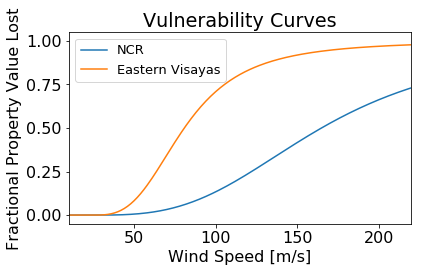

In [25]:
plt.rcParams.update({'font.size': 16})
plt.plot(V,f1,label='NCR')
plt.plot(V,f2,label='Eastern Visayas')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Vulnerability Curves')
plt.legend(fontsize=13)
plt.xlim([10,220])
plt.tight_layout()
plt.savefig(root_dir+'/FIGURES/vulnerabilitycurves_rmsf.png',dpi=400)


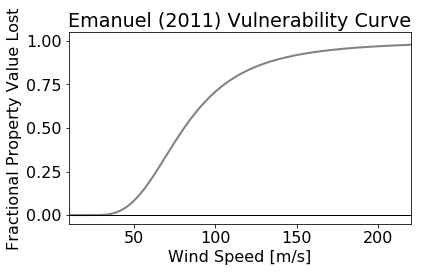

In [13]:
plt.rcParams.update({'font.size': 16})
#plt.plot(V,f1,label='NCR')
plt.plot(V,f2,label='Eastern Visayas',color='grey',linewidth=2)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Emanuel (2011) Vulnerability Curve')
#plt.legend(fontsize=13)
plt.xlim([10,220])
plt.tight_layout()
plt.axhline(0,color='k',linewidth=1)
plt.savefig(root_dir+'/FIGURES/example_vcurve.png',dpi=400)
